In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [9]:
df = pd.read_csv("/content/house_price_of_unit_area.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
## key말고 해당하는 value값만 추출해서 입력과 정갑 데이터 분류
dataset = df.copy()
tf.random.set_seed(777) # 랜덤 시드를 고정해줘서 돌리때마다 랜덤값을 고정

label_data = dataset.pop('house price of unit area')

In [12]:
print(label_data)
print(dataset)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: house price of unit area, Length: 414, dtype: float64
     house age  distance to the nearest MRT station  ...  latitude  longitude
0         32.0                             84.87882  ...  24.98298  121.54024
1         19.5                            306.59470  ...  24.98034  121.53951
2         13.3                            561.98450  ...  24.98746  121.54391
3         13.3                            561.98450  ...  24.98746  121.54391
4          5.0                            390.56840  ...  24.97937  121.54245
..         ...                                  ...  ...       ...        ...
409       13.7                           4082.01500  ...  24.94155  121.50381
410        5.6                             90.45606  ...  24.97433  121.54310
411       18.8                            390.96960  ...  24.97923  121.53986
412        8.1              

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=5, activation='sigmoid'))
model.add(tf.keras.layers.Dense(128,activation='sigmoid'))
model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 41,985
Trainable params: 41,985
Non-trainable params: 0
_________________________________________________________________


In [15]:
optimizer=tf.keras.optimizers.SGD(learning_rate=0.04) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.mean_squared_error  ## 예측값 과 정답의 오차값 정의.
metrics=tf.keras.metrics.RootMeanSquaredError() ### 학습하면서 평가할 메트릭스 선언언

model.compile(loss =loss, optimizer= optimizer, metrics=[metrics])

In [17]:
result = model.fit(dataset, label_data, epochs=100, batch_size=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 8184.7710 - root_mean_squared_error: 90.4697
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 1273.0347 - root_mean_squared_error: 35.6796
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 638.0956 - root_mean_squared_error: 25.2606
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 372.8453 - root_mean_squared_error: 19.3092
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 266.3625 - root_mean_squared_error: 16.3206
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 219.5028 - root_mean_squared_error: 14.8156
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 201.7197 - root_mean_squared_error: 14.2028
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 192.6658 - root_mean_squared_error: 13.8804
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 187.521

In [18]:
print(result.history.keys())

dict_keys(['loss', 'root_mean_squared_error'])


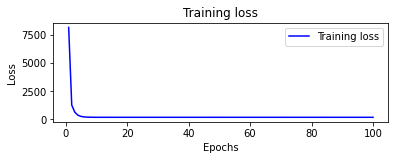

In [24]:
loss = result.history['loss']

# loss 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

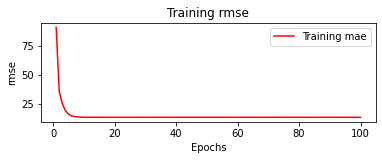

In [25]:
mae = result.history['root_mean_squared_error']
epochs = range(1, len(mae)+1)

# mean absolute error 그래프화
plt.subplot(212)
plt.plot(epochs, mae, 'r-', label='Training mae')
plt.title('Training rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

In [23]:
print(model.evaluate(dataset, label_data))
print("\n Test rmse : %.4f" % (model.evaluate(dataset, label_data)[1]))

13/13 [==============================] - 0s 2ms/step - loss: 184.7027 - root_mean_squared_error: 13.5905
[184.70266723632812, 13.590536117553711]
13/13 [==============================] - 0s 2ms/step - loss: 184.7027 - root_mean_squared_error: 13.5905

 Test rmse : 13.5905
